In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
import data_collection.get_data as gd
import data_collection.taylor_approximation as aprx

In [3]:
X_train = gd.load_data('../pickle/X_train.p')
# get position first deriv, second deriv, and t for an action sequence
p_t, dp_dt, d2p_dt2, t = X_train["a08_s01_e01_skeleton_proj.txt"]

# get one frame of data
def get_frame(frame):
    return p_t[frame - 1], dp_dt[frame -1], d2p_dt2[frame - 1], t[frame - 1]

In [4]:
time_t = 10
time_t_0 = 5
# get features from one frame at time_t_0 (frame 5)
X_train_t_0 = get_frame(time_t_0)

# check that the correct frame was grabbed
assert time_t_0 == X_train_t_0[3]
# check that there are four values 
assert len(X_train_t_0) == 4
# calculate approximation
p_t_aprx = aprx.approximate(*X_train_t_0, time_t)
# check that the shape is correct
assert p_t_aprx.shape == X_train_t_0[0].shape

In [5]:
xs, ys, zs = X_train_t_0[0][:, 0], X_train_t_0[0][:, 1], X_train_t_0[0][:, 2]
xs_aprx, ys_aprx, zs_aprx = p_t_aprx[:, 0], p_t_aprx[:, 1], p_t_aprx[:, 2]

xs = np.append(xs, xs_aprx, axis=0)
ys = np.append(ys, ys_aprx, axis=0)
zs = np.append(zs, zs_aprx, axis=0)

In [6]:
# initialize joint colors of skeleton
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black
aprx_colors = ['orange' for i in range(20)]
colors += aprx_colors

<IPython.core.display.Javascript object>


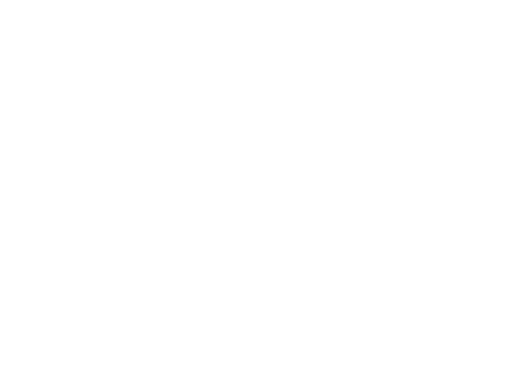

In [7]:
# graph skeleton and skeleton aproximation on top of each other
# the approximation is shown in orange
# there is some difference between the approximation and the skeleton
fig = plt.figure()
fig.set_size_inches(9.5, 9.5)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_1 = ax.scatter(xs, ys, zs, color=colors)
ax.view_init(-75,  90)
ax.set_title('approximation vs actual')
plt.show()

In [8]:
# show a comparrison between t and t_aprrx given interval t_0, t
# this function automates the process above to more easily visualize approximations over different time intervals
def show_aprx(t_0, t, graph_title=None):
    X_train_t_0 = get_frame(t_0)
    p_t_aprx = aprx.approximate(*X_train_t_0, t)
    
    xs, ys, zs = X_train_t_0[0][:, 0], X_train_t_0[0][:, 1], X_train_t_0[0][:, 2]
    xs_aprx, ys_aprx, zs_aprx = p_t_aprx[:, 0], p_t_aprx[:, 1], p_t_aprx[:, 2]

    xs = np.append(xs, xs_aprx, axis=0)
    ys = np.append(ys, ys_aprx, axis=0)
    zs = np.append(zs, zs_aprx, axis=0)
    
    # initialize joint colors of skeleton
    colors = ['blue' for i in range(20)]
    colors[0] = 'red'  # hip is red
    colors[7] = 'green'  # hands and feet are green
    colors[11] = 'green'
    colors[15] = 'green'
    colors[19] = 'green'
    colors[3] = 'black' # head is black
    aprx_colors = ['orange' for i in range(20)]
    colors += aprx_colors
    
    fig = plt.figure()
    fig.set_size_inches(9.5, 9.5)

    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    scatter_1 = ax.scatter(xs, ys, zs, color=colors)
    ax.view_init(-75,  90)
    ax.set_title(graph_title)
    plt.show()
    
    

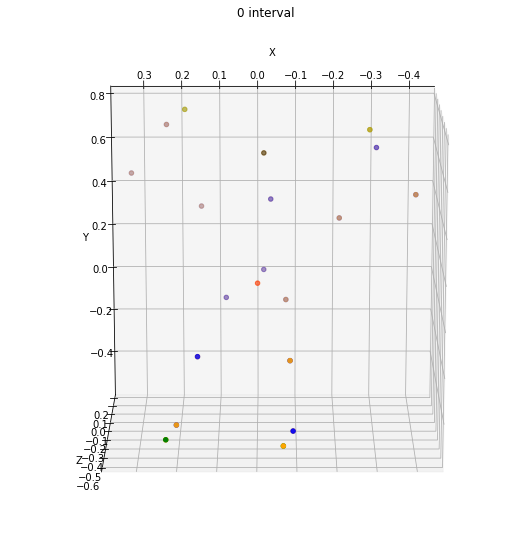

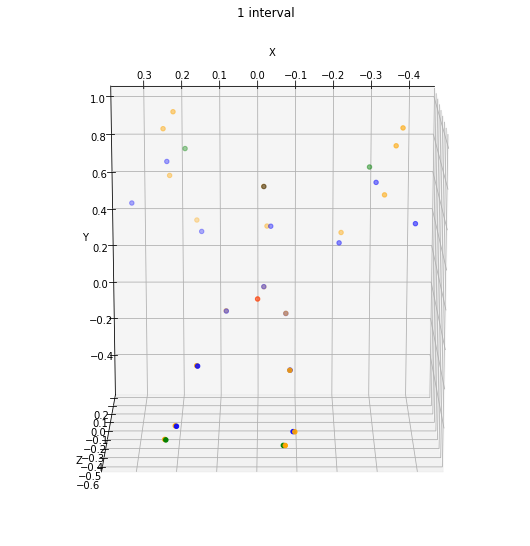

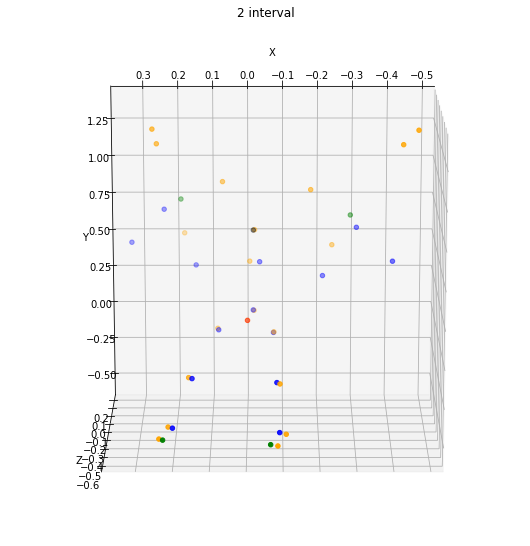

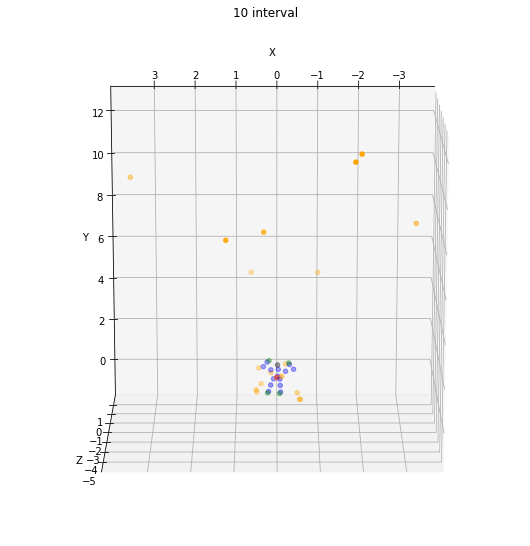

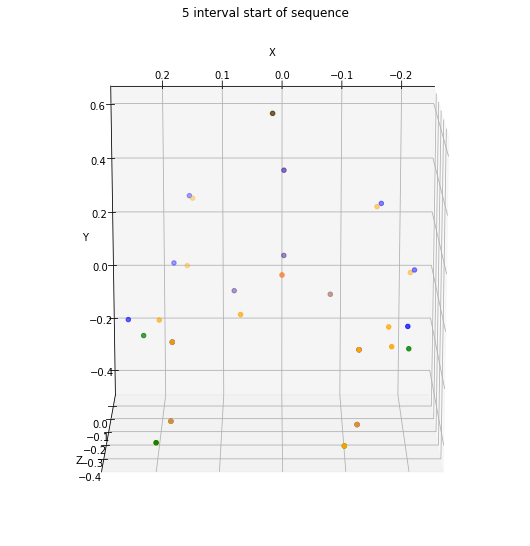

In [9]:
%matplotlib inline
show_aprx(60, 60, '0 interval') # we would expect there to be no difference between the actual and the approximated points
# over a time interval of 0. The graph shows this to be true

show_aprx(60, 61, '1 interval') # over a small time interval the approximation shows significant error
show_aprx(60, 62, '2 interval') # the approximation seems to get significantly worse with a wider interval
show_aprx(60, 70, '10 interval') # a large interval with lots of motion creates a terrible approximation

show_aprx(5, 10, '5 interval start of sequence') # the interval at the start of the sequence is wider than the previous
# intervals but the graph shows that it was better approximated. This could mean that the approximation is less
# accurate when more motion is happening. This could also mean that one or both of th derivatives is being
# incorrectly calculated and more motion is exacerbating the issue


Does the 10 frame interval from 60, 70 show an error in derivative calculations or is it an interval that will
produce a poor approximation?

<IPython.core.display.Javascript object>


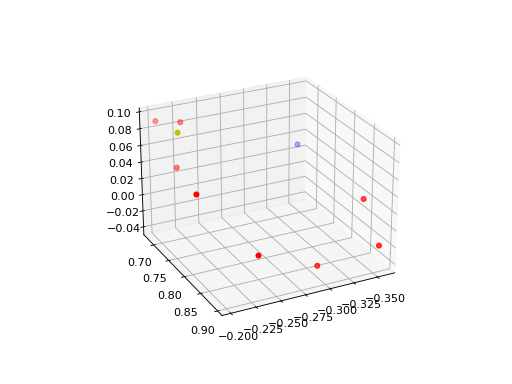

In [18]:
%matplotlib notebook
# looking at a hand joint from that interval over the interfval
# the left hand is joint 8 or index 7
p_t_hand = p_t[60:70, 7, :]
colors = ['b']
colors += ['r' for i in range(8)]
colors += ['y']
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(p_t_hand[:,0], p_t_hand[:,1], p_t_hand[:,2], color=colors)
# plotting this points motion over 10 frames shows a zig-zagging irradic motion
# start point is blue end pt is yellow

In [53]:
# find derivatives for hand at frame 60
from data_collection.derivatives import *
from data_collection.taylor_approximation import *
# to find derivatives we need a window of 2 frames around the current frame for a total of 5 frames
t0 = 60
t = 70
p_t0_interval = p_t[57:62, :,:] 
p_t0 = p_t0_interval[2, 7, :]
print(p_t0_interval.shape)

velocity = first_derivative(p_t0_interval)
velocity_t0 = velocity[2, 7, :] # grab the derivative from t0 frame (60), then get the 8th joint (hand), get x, y, z
print(velocity_t0)

acceleration = second_derivative(p_t0_interval)
acceleration_t0 = acceleration[2, 7, :]
print(acceleration_t0)

# use the first and second derivatives to calculate an approximation
taylor_aprx = approximate(p_t0, velocity_t0, acceleration_t0, t0, t)
print(taylor_aprx)
# the approximation is very large compared to other values

(5, 20, 3)
[-0.07667542  0.12769688 -0.01818942]
[-0.01436214  0.19919614 -0.10673911]
[-1.77732666 11.91158636 -5.44022411]


In [54]:
# manual calculations
first_deriv = p_t0_interval[3, 7, :] - p_t0_interval[1, 7, :] 
assert np.allclose(first_deriv, velocity_t0, rtol=1e-12)

second_deriv = p_t0_interval[4, 7, :] + p_t0_interval[0, 7, :] - 2 * p_t0_interval[2, 7, :]
assert np.allclose(second_deriv, acceleration_t0, rtol=1e-12)

man_aprx = p_t0_interval[2, 7, :] + first_deriv * 10 + .5 * second_deriv * 100
assert np.allclose(taylor_aprx, man_aprx, rtol=1e-12)

All asserts pass so it is reasonable that the taylor series could give a poor approximation for frames joints with a large amount of movement over a long interval